In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 5]

import yfinance as yf
import pandas as pd
import sklearn
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\acer\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\acer\miniconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\acer\miniconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [83]:
# import the tweet dataset

df = pd.read_csv('tweet_dset.csv')
df = df[df['ticker'] == '$AAPL']

In [84]:
df['ctime'] = pd.to_datetime(df['date_time'], unit='s')
df = df.set_index('ctime')
mean = df['sentiment'].resample('1d').mean()

In [85]:
# delete weekends

bdays = mean[mean.index.dayofweek < 5]

In [86]:
# download stock values and compute returns

apl = yf.Ticker("AAPL")
apple = apl.history(start="2021-06-23", end="2021-07-28", interval="1d")

returns = apple['Close'] + apple['Dividends']

In [87]:
diff = returns.diff()
Diff = diff.dropna()

In [88]:
# check and always use dataframe of equal lenght

print(len(Diff), len(diff), len(mean), len(bdays))

24 25 34 24


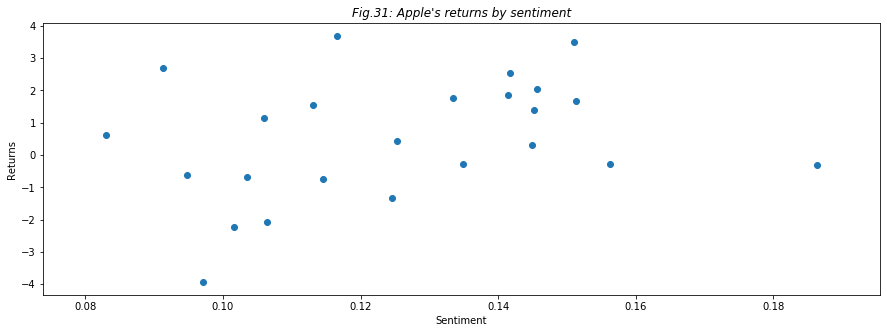

In [89]:
# scatterplot
plt.scatter(bdays, Diff)
plt.title("Fig.31: Apple's returns by sentiment", style='italic')
plt.ylabel('Returns')
plt.xlabel('Sentiment')
plt.show()

In [90]:
# covariance
covariance = np.cov(bdays, Diff)
print(covariance)

[[6.39195875e-04 1.38571716e-02]
 [1.38571716e-02 3.51661198e+00]]


In [91]:
# pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(bdays, Diff)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.292
